In [1]:
!pip install nltk textblob datasets transformers seaborn matplotlib wordcloud vaderSentiment

In [2]:
from datasets import load_dataset

imdb = load_dataset("imdb")

print(imdb['train'].features)
imdb['train'].to_pandas().head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [3]:
tweet_eval = load_dataset("tweet_eval", "sentiment")

print(tweet_eval['train'].features)
tweet_eval['train'].to_pandas().head()


README.md:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'neutral', 'positive'], id=None)}


,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [4]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+|[^\w\s]', '', text)
    text = text.lower()
    return text

imdb_train = imdb['train'].to_pandas()
imdb_train['cleaned_text'] = imdb_train['text'].apply(clean_text)


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

imdb_train['sentiment_scores'] = imdb_train['cleaned_text'].apply(lambda x: sia.polarity_scores(x))
imdb_train['compound'] = imdb_train['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

imdb_train['sentiment'] = imdb_train['compound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

imdb_train[['cleaned_text', 'compound', 'sentiment']].head()


,cleaned_text,compound,sentiment
0,i rented i am curiousyellow from my video stor...,-0.3517,negative
1,i am curious yellow is a risible and pretentio...,-0.8648,negative
2,if only to avoid making this type of film in t...,0.7729,positive
3,this film was probably inspired by godards mas...,-0.0924,negative
4,oh brotherafter hearing about this ridiculous ...,-0.9427,negative


<ipython-input-6-787a71c7eb3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=imdb_train, palette='coolwarm')


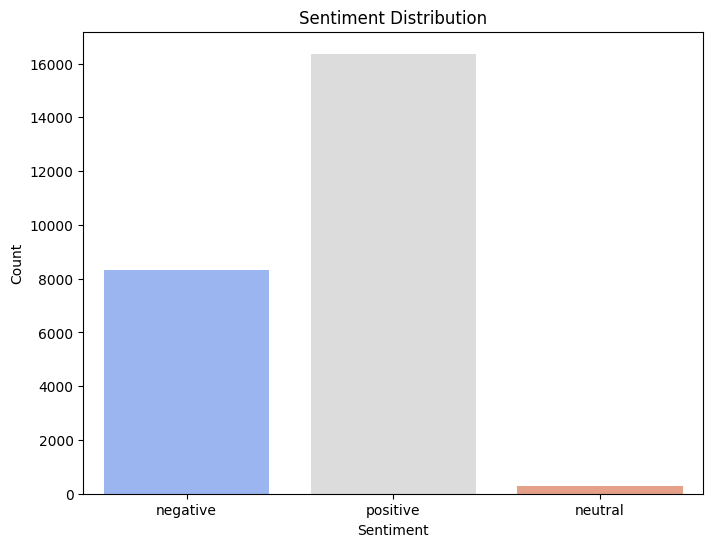

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=imdb_train, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


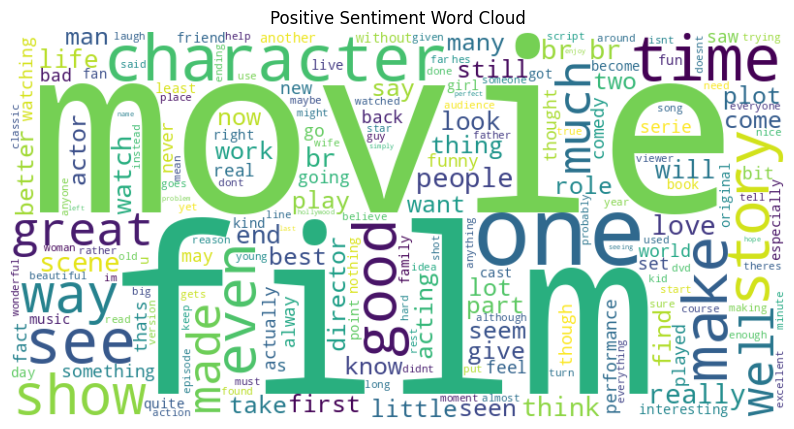

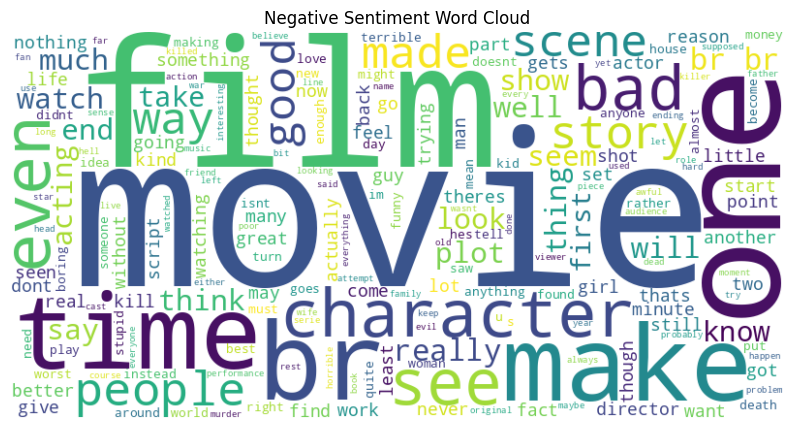

In [7]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment_label):
    text = ' '.join(imdb_train[imdb_train['sentiment'] == sentiment_label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'{sentiment_label.capitalize()} Sentiment Word Cloud')
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')
